In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('AllStationsTempRHRainSolRad.csv')
df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad
0,1,22/07/20,13:30,25.8,60.0,0.0,491.0
1,1,22/07/20,14:00,25.8,59.0,0.0,476.0
2,1,22/07/20,14:30,26.1,58.0,0.0,365.0
3,1,22/07/20,15:00,26.0,58.0,0.0,316.0
4,1,22/07/20,15:30,26.2,58.0,0.0,299.0


In [2]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%y')
print(df.dtypes)

StationID             int64
Date         datetime64[ns]
Time                 object
Temp                float64
RelHum              float64
Rain                float64
SolarRad            float64
dtype: object


In [3]:
df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad
0,1,2020-07-22,13:30,25.8,60.0,0.0,491.0
1,1,2020-07-22,14:00,25.8,59.0,0.0,476.0
2,1,2020-07-22,14:30,26.1,58.0,0.0,365.0
3,1,2020-07-22,15:00,26.0,58.0,0.0,316.0
4,1,2020-07-22,15:30,26.2,58.0,0.0,299.0


In [4]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad
0,1,2020-07-22,13:30,25.8,60.0,0.0,491.0
1,1,2020-07-22,14:00,25.8,59.0,0.0,476.0
2,1,2020-07-22,14:30,26.1,58.0,0.0,365.0
3,1,2020-07-22,15:00,26.0,58.0,0.0,316.0
4,1,2020-07-22,15:30,26.2,58.0,0.0,299.0


In [5]:
df.shape

(911605, 7)

In [6]:
print(df.dtypes)

StationID      int64
Date          object
Time          object
Temp         float64
RelHum       float64
Rain         float64
SolarRad     float64
dtype: object


In [7]:
# Filter data by date
# Season: october, november, december, january, february and march

# before october 2020
df = df[~(df['Date'] < pd.to_datetime("2020-10-01").date())]

# delete between april and september, every year
for i in range(2020,2024):
    from_ts = pd.to_datetime(str(i)+'-04-01').date()
    to_ts = pd.to_datetime(str(i)+'-09-30').date()
    df = df[(df['Date'] < from_ts) | (df['Date'] > to_ts)]

#delete the end of 2023
from_ts = pd.to_datetime("2023-04-01").date()
to_ts = pd.to_datetime("2023-06-30").date()
df = df[(df['Date'] < from_ts) | (df['Date'] > to_ts)]


df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad
3381,1,2020-10-01,00:00,19.8,81.0,0.0,0.0
3382,1,2020-10-01,0:30,19.5,82.0,0.0,0.0
3383,1,2020-10-01,1:00,19.7,82.0,0.0,0.0
3384,1,2020-10-01,1:30,19.8,83.0,0.0,0.0
3385,1,2020-10-01,2:00,19.3,85.0,0.0,0.0


In [67]:
df.shape

(472908, 7)

In [8]:
# Maximum of measurements
# t = measurements per day
# d = days per season
# y = number of years/seasons
# s = number of stations
#       MaxMeas = t * d * y * s
maxMeasurements = 48*182*3*19

realMeasurements = len(df.index)

missingValues = maxMeasurements - realMeasurements


print("Maximum number of measurements: "+str(maxMeasurements))
print("Real number of measurements: "+str(realMeasurements))
print("Missing measurements: "+str(missingValues))

Maximum number of measurements: 497952
Real number of measurements: 472908
Missing measurements: 25044


In [9]:
print("Missing Values")
print(missingValues/maxMeasurements)
print(realMeasurements/maxMeasurements)


Missing Values
0.05029400424137266
0.9497059957586274


In [17]:
null_count = df.isnull().sum().sum()
print("Null values: "+str(null_count))
print("%: "+str(null_count/maxMeasurements))


Null values: 8428
%: 0.016925326135852452


In [68]:
from datetime import datetime

df['doy']=0

for index, row in df.iterrows():
    objDate = row['Date']
    day = objDate.timetuple().tm_yday
    year = objDate.timetuple().tm_year
    mon = objDate.timetuple().tm_mon
    if (year == 2020): # leap year 
        if (mon > 2):
            day = day - 1
    
    df.at[index,'doy'] = day
    
df.head()


,StationID,Date,Time,Temp,RelHum,Rain,SolarRad,doy
3381,1,2020-10-01,00:00,19.8,81.0,0.0,0.0,274
3382,1,2020-10-01,0:30,19.5,82.0,0.0,0.0,274
3383,1,2020-10-01,1:00,19.7,82.0,0.0,0.0,274
3384,1,2020-10-01,1:30,19.8,83.0,0.0,0.0,274
3385,1,2020-10-01,2:00,19.3,85.0,0.0,0.0,274


In [69]:
# from time (minutes) to time of day (1-96)
import time
    
df['tod'] = 0

for index, row in df.iterrows():
    strTime = row['Time']
    objTime = time.strptime(strTime, "%H:%M")
    df.at[index,'tod'] = objTime.tm_hour*2 + objTime.tm_min/30 + 1

df['tod'] = df['tod'].astype(int)
df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad,doy,tod
3381,1,2020-10-01,00:00,19.8,81.0,0.0,0.0,274,1
3382,1,2020-10-01,0:30,19.5,82.0,0.0,0.0,274,2
3383,1,2020-10-01,1:00,19.7,82.0,0.0,0.0,274,3
3384,1,2020-10-01,1:30,19.8,83.0,0.0,0.0,274,4
3385,1,2020-10-01,2:00,19.3,85.0,0.0,0.0,274,5


In [70]:
df.to_csv('AllStationsTempRHRainSolRadDOYTOD.csv', index=False)

In [ ]:
# ARQUIVO ACABA AQUI

In [11]:
#CONTINUAR DAQUI DEPOIS
#verificar esses dados faltantes
df.isna().sum()

StationID       0
Date            0
Time            0
Temp         2872
RelHum       2858
Rain            0
SolarRad     2698
doy             0
tod             0
dtype: int64

In [12]:
df.tail()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad,doy,tod
907694,20,2023-03-31,21:30,19.9,93.0,0.2,0.0,90,44
907695,20,2023-03-31,22:00,18.8,90.0,0.0,0.0,90,45
907696,20,2023-03-31,22:30,18.1,87.0,0.0,0.0,90,46
907697,20,2023-03-31,23:00,18.1,86.0,0.0,0.0,90,47
907698,20,2023-03-31,23:30,17.8,86.0,0.0,0.0,90,48


In [13]:
# Aggregation

df_aggregated = df.groupby(['StationID','Date']).agg({'Temp':'mean', 'RelHum':'mean', 'Rain':'sum', 'SolarRad':'sum', 'doy':'mean'})
df_aggregated = df_aggregated.reset_index()
df_aggregated['doy'] = df_aggregated['doy'].astype(int)
df_aggregated.head(100)

,StationID,Date,Temp,RelHum,Rain,SolarRad,doy
0,1,2020-10-01,21.625000,86.479167,17.6,7904.0,274
1,1,2020-10-02,13.041667,91.833333,14.6,2281.0,275
2,1,2020-10-03,9.902083,88.916667,16.6,2589.0,276
3,1,2020-10-04,11.883333,89.416667,0.6,3166.0,277
4,1,2020-10-05,13.687500,92.354167,0.0,2951.0,278
...,...,...,...,...,...,...,...
95,1,2021-01-04,24.395833,66.895833,0.0,14793.0,4
96,1,2021-01-05,21.045833,87.104167,30.8,4668.0,5
97,1,2021-01-06,25.364583,75.770833,0.0,13699.0,6
98,1,2021-01-07,24.758333,61.208333,0.0,14824.0,7


In [14]:
df_aggregated.shape

(9899, 7)

In [19]:
# doy aggregation
# [01/10 - 31/03] = 182 days

df_days = df_aggregated.groupby(['StationID','doy'])[['Temp','RelHum','Rain','SolarRad']].mean()
df_days = df_days.reset_index()
df_days.head(100)

,StationID,doy,Temp,RelHum,Rain,SolarRad
0,1,1,25.400694,56.916667,0.000000,16691.000000
1,1,2,22.227778,72.590278,0.200000,10802.666667
2,1,3,23.010417,66.729167,0.000000,16440.333333
3,1,4,24.172222,68.263889,0.000000,14809.000000
4,1,5,21.702083,77.534722,10.266667,11129.333333
...,...,...,...,...,...,...
95,1,279,14.378472,83.437500,6.866667,8543.333333
96,1,280,13.938194,78.923611,0.000000,11411.666667
97,1,281,15.144444,74.631944,0.200000,12377.333333
98,1,282,13.399306,71.736111,0.000000,11974.666667


In [20]:
df_days.shape

(3458, 6)

In [26]:
# sort by doy

import pandas as pd

# Get the unique values of StationID
unique_station_ids = df_days['StationID'].unique()

# Create an empty list to hold the dataframes
split_dfs = []

# Loop over the unique values of StationID and split the dataset accordingly
for station_id in unique_station_ids:
    df_temp = df_days[df_days['StationID'] == station_id]
    firstMonthsYear = df_temp[df_temp["doy"] <= 90] # 31/03
    lastMonthsYear = df_temp[df_temp["doy"] >= 274] # 01/10
    df_season = pd.concat([lastMonthsYear, firstMonthsYear])

    split_dfs.append(df_season[['Temp','RelHum','Rain','SolarRad']])
    
    

In [32]:
# Get the length of the first two dimensions of the array
dim1 = len(split_dfs)
dim2 = split_dfs[0].shape[0]
dim3 = split_dfs[0].shape[1]

print(str(dim1))
print(str(dim2))
print(str(dim3))


df_array = np.zeros((dim1, dim2, dim3))

# Copy the values from the dataframes to the new array
for i, df in enumerate(split_dfs):
    df_array[i, :, :] = df.values

19
182
4


In [58]:
# ver estacoes

stations = pd.read_csv('./data_csv/SIMAGROStationsList.csv')
names = stations[['StationName','StationID']]
print(names)

                             StationName  StationID
0      Pinheiro Machado (Olival Batalha)          1
1               Piratini (Olival Olivae)          2
2           São Sepé (Olival Prosperato)          3
3                        Itaqui (Vimaer)          4
4          Maçambara (Fazenda Espinilho)          5
5             Rosário do Sul (Vila Temp)          6
6                 Getúlio Vargas (Ideal)          7
7                    Ilópolis (Ibramate)          8
8   Barra do Ribeiro (Olival Prosperato)          9
9              Cachoeira do Sul (Capané)         10
10             Canguçu (Olival Capolivo)         11
11          Herval (Fazenda Pitangueira)         12
12        Lavras do Sul (Fazenda Galpão)         13
13                      São Borja (DDPA)         14
14           Bossoroca (Sindicato Rural)         15
15             Jaguari (Mirante Minuzzi)         16
16                  Caxias do Sul (DDPA)         18
17          Porto Vera Cruz (Prefeitura)         19
18          

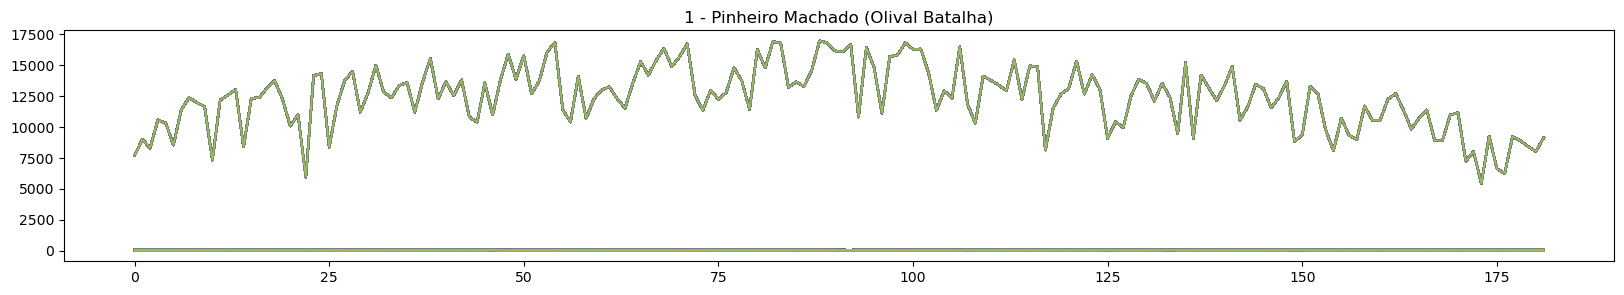

In [59]:
# grid of plots
import os
import math
# Essential Libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

for index, item in enumerate(df_array):
    plt.figure(figsize=(20,3))
    
    stationId = unique_station_ids[index]
    
    result = names[names['StationID'] == stationId]
    stationName = result.iloc[0]['StationName']
    plt.title(str(stationId)+" - "+stationName)
    
    
    for i in item:
        plt.plot(item, '-',c=(np.random.random(), np.random.random(), np.random.random()))
    
    break



In [78]:
for x in range(1,21):
    if (x==17):
        continue
    
    dates = df[df["StationID"]==x]
    print("\n")
    print(x)
    print("Start date:")
    print(dates['Date'].min())
    print("\nEnd date:")
    print(dates['Date'].max())
    



1
Start date:
2020-07-22

End date:
2023-06-21


2
Start date:
2020-07-22

End date:
2023-06-21


3
Start date:
2020-07-23

End date:
2023-06-21


4
Start date:
2020-07-29

End date:
2023-06-21


5
Start date:
2020-07-29

End date:
2023-06-21


6
Start date:
2020-07-30

End date:
2023-06-21


7
Start date:
2020-08-05

End date:
2023-06-21


8
Start date:
2020-08-06

End date:
2023-06-21


9
Start date:
2020-08-07

End date:
2023-06-21


10
Start date:
2020-01-07

End date:
2023-06-21


11
Start date:
2020-08-19

End date:
2023-06-21


12
Start date:
2020-08-20

End date:
2023-06-21


13
Start date:
2020-08-21

End date:
2023-06-21


14
Start date:
2020-11-12

End date:
2023-06-21


15
Start date:
2020-11-13

End date:
2023-06-21


16
Start date:
2020-11-13

End date:
2023-06-21


18
Start date:
2020-11-20

End date:
2023-06-20


19
Start date:
2020-12-03

End date:
2023-06-21


20
Start date:
2020-12-04

End date:
2023-06-21


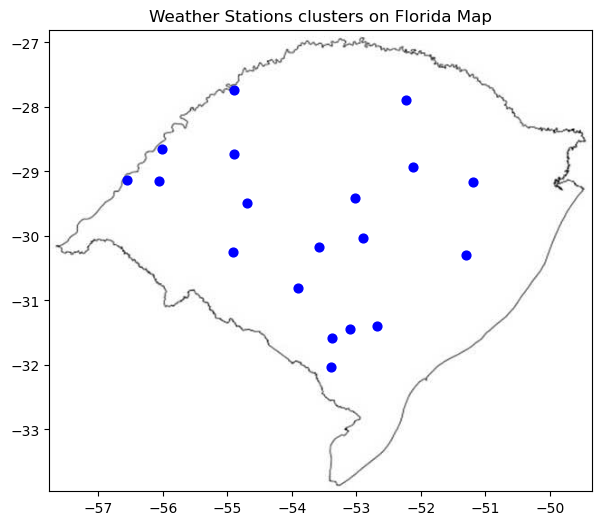

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data_csv/SIMAGROStationsList.csv')

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
stations_coord = df[['StationName','StationID','latitude', 'longitude']]

stations_sort = stations_coord.sort_values('StationID')
df_plot = stations_sort.copy()

BBox = ((-57.766, -49.351, #longitude
          -33.962, -26.800)) #latitude


rs_map = plt.imread('rs_map_white.jpeg')
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(stations_coord.longitude, stations_coord.latitude, zorder=1, alpha=1, c='b', s=40)
    
ax.set_title('Weather Stations clusters on Florida Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rs_map, zorder=0, extent = BBox, aspect= 'equal')